## Часть 1
Напишите скрипт, который скачивает  сообщения с Телеграм-канала https://t.me/Sputnik_results . Сохраните сообщения в формате по вашему выбору (.csv, .jsonl, sqlite, parquet, и т.д.). Откройте с помощью Pandas или Arrow, постройте график числа сообщений в зависимости от даты.

### Часть 2
1. Напишите функции для извлечения данных из сообщений:,
   - пол участника,
   - возраст участника,

Постройте диаграммы для визуализации,

2. Реализуйте какой-либо анализ этих данных на ваше усмотрение. Например их можно кластеризовать и интерпретировать кластеры, или попробовать выделить статистику по среднему количеству антител в зависимости от возраста, или посчитать количество заболевших после вакцинации. Обязательная визуализация.

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns

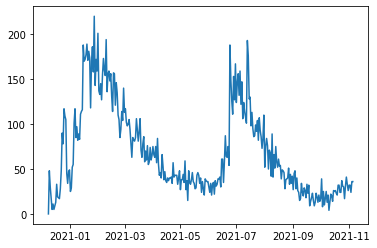

In [74]:
# считанные данные в файле
df = pd.read_json('message_telegram.json', encoding='utf8')
df['date'] = pd.to_datetime(df['date']).dt.date
df_1 = df.groupby('date')['message'].count()
plt.plot(df_1)

In [75]:
def man_or_woman(text):
    if pd.notna(text):
        pattern = re.compile(r'[Жж]енщина|[Мм]ужчина|\b[МмЖж]..?\d\d|\b[МмЖж]\d\d|\b[Жж]ен.+\d\d\B|\b[Мм]уж.+\d\d\B')
        find_list = pattern.findall(text)
        list_to_write = []
        for i in find_list:
            list_to_write.append(i[0].upper())
        return list_to_write
    return []

<AxesSubplot:>

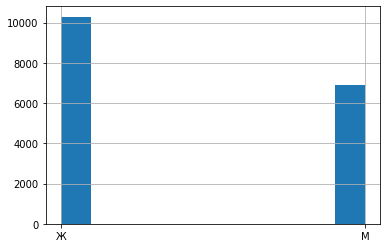

In [76]:
df['sex'] = df.message.apply(lambda x: man_or_woman(x))
df['sex'].explode().hist()

In [81]:
def age(text):
    if pd.notna(text):
        pattern = re.compile(r'\b[МмЖж]..?\d\d|\b[МмЖж]\d\d|\b\d\d\sгода?|\b\d\d\sлет')
        listage = pattern.findall(text)
        list_to_write = []
        for i in listage:
            if i[-2:].isalpha():
                list_to_write.append(int(i[:2]))
            else:
                list_to_write.append(int(i[-2:]))
        return list_to_write
    return 0


<AxesSubplot:>

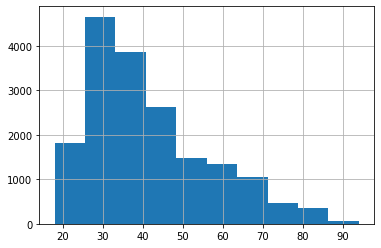

In [82]:
df['age'] = df.message.apply(lambda x: age(x))
df_temp = df['age'].explode()
df_temp[df_temp >= 18].hist()

In [96]:
def temp(text):
    if pd.notna(text):
        sumt = 0
        pattern = re.compile(r'3\d[.,]\d')
        listt = pattern.findall(text)
        if len(listt) != 0:
            for i in listt:
                if i[2] == ',':
                    i = ('.').join(i.split(','))
                sumt += float(i)
            mean_t = sumt / len(listt)
        else:
            return 0
        return mean_t
    return 0

<AxesSubplot:xlabel='age', ylabel='temperature'>

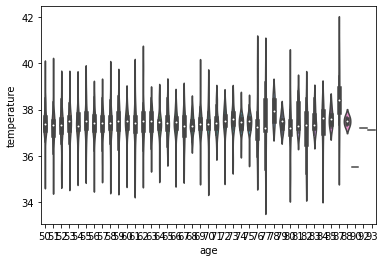

In [97]:
# Зависимость повышения температуры от возраста людей за 50 
df['temperature'] = df.message.apply(lambda x: temp(x))
df = df.explode('age')
df_choose = df[(df.temperature >= 35) & (df.age >= 50)][['temperature', 'age']]
sns.violinplot(x='age', y='temperature', data = df_choose)